### DSC 478 Project - Final Report
### Team Members: 
Serena Yang, Zhong Hua Xie, Jason Kates 

### Introduction

Nowadays, buying a car with a loan is a prevalent trend for most people; however, this will lead to a big challenge for financial institutions. Suppose the financial institutions’ vehicle loans forecasting model is not good enough. In that case, it will most likely bring losses to the financial institutions since some of them may not be able to pay their loans. For this project, our team will apply some algorithms based on the users’ background information, previous loan and credit history to make the best model and predict the test dataset to get prediction accuracy. We will mainly use Python for this project.

### Dataset

The dataset that we used was downloaded from the Kaggle (https://www.kaggle.com/avikpaul4u/vehicle-loan-default-prediction)  website. Before we did data cleaning, the dataset contained 233k+ rows and 41 variables, including numeric, categorical, date, and binary variables. 

For those missing values, we will delete the rows of missing categorical and date variables; fill in the mean value of those who got loan/didn't get for missing numerical and binary variables. After we did the data cleaning, there are about 225k+ rows left. We separated this dataset into two parts: 80% as the training dataset and 20% as the test dataset. 

### Analysis Approach: 

Our analysis approach is to conduct as many classification models as possible to predict vehicle loan default based on loaner’s information(attributes). Then compare the models using the ROC curve to determine which model is ideal for vehicle loan default prediction.  

The list of classifiers we will be used for this project:

    1. PCA/Factor Analysis  
    2. Decision tree  
    3. Logistic Regression  
    4. KNN   
    5. Naive Bayes 
    
### Plan for Evaluation – Analysis of Results/Discussion:  

1. Compare the different models classification metrics for performance and accuracy, also include confusion matrix for each model
2. Graphically represent the models with Hyperparameter tuning 
3. Compare the models with the ROC curve 

### Plan Work Distribution: 

For the project, West will be assigned to format, clean, and split the dataset into train and test datasets. Normalize numeric attribute into a set range, remove or fill out null entries, convert categorical attributes into dummy variables, and split the dataset by 80 and 20 for training and testing dataset. 

After West did data preparation, each of the team members will do the classifiers assigned as below:   

    West – Logistic Regression 
    West - Decision Tree
    Jason – PCA/Factor Analysis   	   
    Serena – Naive Bayes   
    Serena – KNN   

 

## Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('train.csv', sep = ',', header = 0)

In [5]:
df

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-1988,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-1988,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-1976,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-1994,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [6]:
#search all and output any row with nulls
df[df.isnull().any(axis = 1)]

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
87,525234,52428,67405,81.60,78,17014,45,2099,05-08-1998,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
88,637252,51653,63896,86.08,78,17014,45,2079,24-02-1999,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
91,584433,49488,63306,83.72,78,17014,45,2069,27-11-1998,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
99,515149,40884,59313,70.81,78,17014,45,2099,24-02-1998,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
125,547112,49683,62577,83.10,78,17014,45,2099,01-01-1998,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231722,494458,43272,59313,74.86,78,17014,45,2093,03-03-1998,NaN,...,0,0,1125,0,0,0,1yrs 10mon,1yrs 10mon,3,0
231737,419420,36750,62852,60.14,78,17014,45,2082,01-01-1998,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
231756,553774,50683,67746,79.71,78,16803,86,2055,16-08-1999,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
231767,594901,55728,74748,79.60,78,16803,86,2073,01-01-1999,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


The vehicle loan default dataset contains 233153 records with 41 attributes. Two of the attributes are categorical, while most of the attributes are numerical and binary. The dataset includes 7661 rows with null values, which all of them were derived from the attribute Employment Type. Because the attribute is categorical, we cannot estimate its value by regression or by the average of the attribute. Therefore, we decided to remove it from the dataset. Subsequently, the dataset now contains 225493 rows of records.

In [7]:
#drop all NA in employement_type 
df = df.dropna(subset = ['EMPLOYMENT_TYPE'])

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UNIQUEID,225493.0,535677.453783,6.833722e+04,417428.0,476481.00,535593.00,594774.00,6.710840e+05
DISBURSED_AMOUNT,225493.0,54240.728830,1.277559e+04,13320.0,47049.00,53703.00,60213.00,9.873540e+05
ASSET_COST,225493.0,75631.131884,1.852758e+04,37000.0,65625.00,70807.00,78966.00,1.328954e+06
LTV,225493.0,74.806634,1.144189e+01,13.5,68.96,76.89,83.73,9.500000e+01
BRANCH_ID,225493.0,73.070614,7.001415e+01,1.0,14.00,61.00,130.00,2.610000e+02
SUPPLIER_ID,225493.0,19645.597890,3.494024e+03,10524.0,16555.00,20333.00,23004.00,2.480300e+04
MANUFACTURER_ID,225493.0,69.072251,2.216468e+01,45.0,48.00,86.00,86.00,1.560000e+02
CURRENT_PINCODE_ID,225493.0,3375.718133,2.253217e+03,1.0,1509.00,2949.00,5682.00,7.345000e+03
STATE_ID,225493.0,7.241551,4.460856e+00,1.0,4.00,6.00,10.00,2.200000e+01
EMPLOYEE_CODE_ID,225493.0,1550.665453,9.756646e+02,1.0,713.00,1452.00,2365.00,3.795000e+03


Positive examples = 48967
Negative examples = 176526
Proportion of positive to negative examples = 27.74%


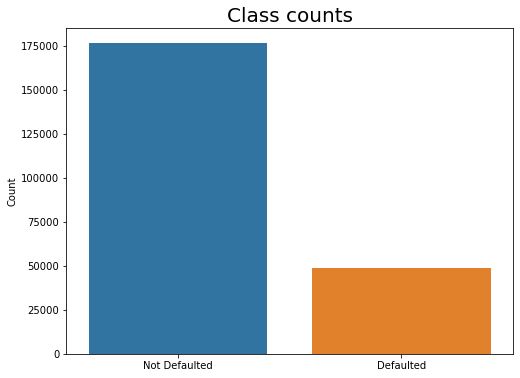

In [9]:
import seaborn as sns
# Get number of positve and negative examples
pos = df[df["LOAN_DEFAULT"] == 1].shape[0]
neg = df[df["LOAN_DEFAULT"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(df["LOAN_DEFAULT"])
plt.xticks((0, 1), ["Not Defaulted", "Defaulted"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

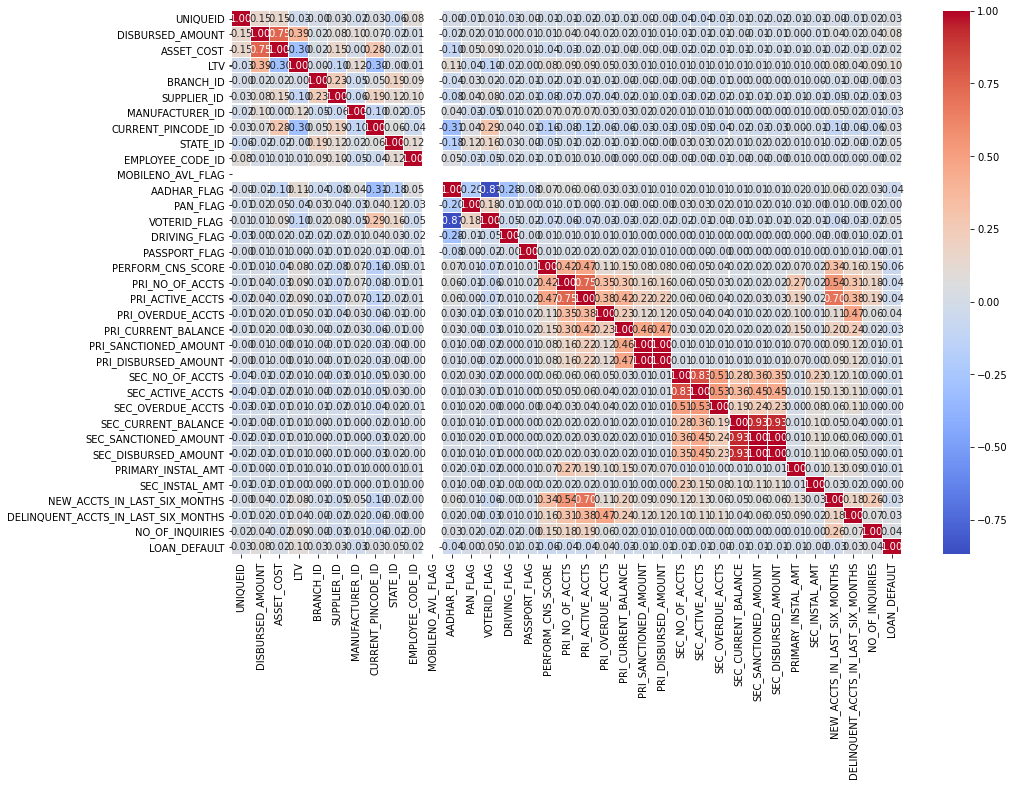

In [10]:
f, ax = plt.subplots(figsize=(15, 10))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)

In [11]:
import datetime as dt
pd.options.mode.chained_assignment = None  # default='warn'

#format dataset into correct type
df['DATE_OF_BIRTH'] =  pd.to_datetime(df['DATE_OF_BIRTH'], format='%d-%m-%Y')
df['DISBURSAL_DATE'] =  pd.to_datetime(df['DISBURSAL_DATE'], format='%d-%m-%Y')
df['DATE_OF_BIRTH'] = df['DATE_OF_BIRTH'].map(dt.datetime.toordinal)
df['DISBURSAL_DATE'] = df['DISBURSAL_DATE'].map(dt.datetime.toordinal)

In [12]:
#split AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH into year month
df[['AVERAGE_ACCT_YR', 'AVERAGE_ACCT_M']] = df['AVERAGE_ACCT_AGE'].str.split(' ', expand = True)
df['AVERAGE_ACCT_YR'] = df['AVERAGE_ACCT_YR'].str.extract('(\d+)')
df['AVERAGE_ACCT_M'] = df['AVERAGE_ACCT_M'].str.extract('(\d+)')
#to numeric
df['AVERAGE_ACCT_YR'] = pd.to_numeric(df['AVERAGE_ACCT_YR'])
df['AVERAGE_ACCT_M'] = pd.to_numeric(df['AVERAGE_ACCT_M'])

df[['CREDIT_HISTORY_LENGTH_YR', 'CREDIT_HISTORY_LENGTH_M']] = df['CREDIT_HISTORY_LENGTH'].str.split(' ', expand = True)
df['CREDIT_HISTORY_LENGTH_YR'] = df['CREDIT_HISTORY_LENGTH_YR'].str.extract('(\d+)')
df['CREDIT_HISTORY_LENGTH_M'] = df['CREDIT_HISTORY_LENGTH_M'].str.extract('(\d+)')
#to numeric
df['CREDIT_HISTORY_LENGTH_YR'] = pd.to_numeric(df['CREDIT_HISTORY_LENGTH_YR'])
df['CREDIT_HISTORY_LENGTH_M'] = pd.to_numeric(df['CREDIT_HISTORY_LENGTH_M'])

#drop the old AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH
df = df.drop(columns = ['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH'])

Next, the dataset contains date attributes; we formatted it into DateTime and to its DateTime structure. Then we transformed the DateTime object into the proleptic Gregorian ordinal of the date. The transformation was done to preserve the DateTime function while it is in the numeric formation and prevent any possible error on algorithms that do not recognize the DateTime attribute. 

The attribute average account age and credit history length were in the string format and was required to split into year and month. 

Transforming DateTime attributes into numeric was essential to our research is because most defaults derived from an economic crisis. The first action of recovering is to forgo any unnecessary loan. One popular loan type is vehicle loan, so it is essential to retain the DateTime information while it meets most algorithm numeric requirements.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225493 entries, 0 to 233153
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             225493 non-null  int64  
 1   DISBURSED_AMOUNT                     225493 non-null  int64  
 2   ASSET_COST                           225493 non-null  int64  
 3   LTV                                  225493 non-null  float64
 4   BRANCH_ID                            225493 non-null  int64  
 5   SUPPLIER_ID                          225493 non-null  int64  
 6   MANUFACTURER_ID                      225493 non-null  int64  
 7   CURRENT_PINCODE_ID                   225493 non-null  int64  
 8   DATE_OF_BIRTH                        225493 non-null  int64  
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       225493 non-null  int64  
 11  STATE_ID     

In [14]:
#turn categorical attributes into dummy variables
df = pd.get_dummies(df, columns = ['EMPLOYMENT_TYPE', 'PERFORM_CNS_SCORE_DESCRIPTION'])

#drop unique ID
df = df.drop(columns = ['UNIQUEID'])

Lastly, we dropped UNIQUEID, customer's loan identifier, and transformed the two categorical attributes into dummy variables, preserving the categorical effect. After the dataset was cleaned, we have 225493 records, 61 attributes. Of 225493 records, there are 48967 loans defaulted.

----

## Regression

In [14]:
df_LR = df
df_LR_target = df_LR['LOAN_DEFAULT']
df_LR = df_LR.drop(columns = ['LOAN_DEFAULT'])

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

#convert into np array and concatenate dataset for multiple-regression
x = np.array([np.concatenate((v,[1])) for v in np.array(df_LR)])
y = np.array(df_LR_target)

In [16]:
LR = LinearRegression()
LR.fit(x, y)

predit = LR.predict(x)
error = abs(predit-y)
total_error = np.dot(error,error)
rmse_train = np.sqrt(total_error/len(predit))
score = LR.score(x,y)

print('Score:', score)
print('Total error:', total_error)
print('The RMSE is:',rmse_train)

Score: 0.037774093971681855
Total error: 36885.54107538017
The RMSE is: 0.4044469335091886


The initial multiple-regression's RMSE was .404, representing that about 40.4% of the data can be accurately predicted default status by this regression model. 40.4% is low for a model; however, it can be improved by feature selection. Removing unnecessary attributes can improve the computational time and reduce noise.

1 0.3362930625705878
4 0.33406693347631833
7 0.3328014317951992
10 0.3326091361586397
13 0.3324696402335848
16 0.33167867724609346
19 0.3303848135503572
22 0.3302477138098061
25 0.33022266934515765
28 0.3297280251885723
31 0.32962497032997473
34 0.3293035863943272
37 0.3290191465069797
40 0.328669541505011
43 0.32846849374258646
46 0.32843590873566086
49 0.32843615058570463
52 0.3282117460149129
55 0.32812771628762183
58 0.3280948746048345
61 0.32800712594660747


Percentile of features:61 

Optimal number of features:37 



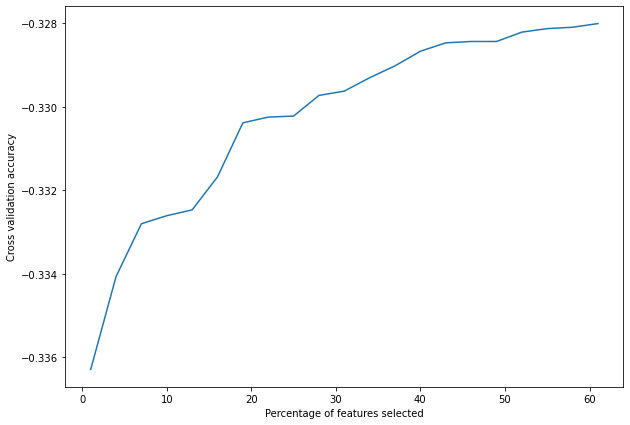

In [17]:
#disable divide by zero warning
import warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)

#split dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 930)

from sklearn import feature_selection
from sklearn import model_selection

percentiles = range(1,64,3)
results = []

for i in range(1,64,3):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    x_train_fs = fs.fit_transform(x_train, y_train)
    scores = model_selection.cross_val_score(LR, x_train_fs, y_train, scoring='neg_mean_absolute_error', cv=5)
    print(i, abs(scores.mean()))
    results = np.append(results, scores.mean())

optimal_percentile = np.where(results == results.max())[0]
print('\n')
print ('Percentile of features:{0}'.format(percentiles[optimal_percentile[0]]), '\n')
optimal_num_features = int(percentiles[optimal_percentile[0]] * len(df.columns) / 100)
print ('Optimal number of features:{0}'.format(optimal_num_features), '\n')

# Plot percentile of features VS. cross-validation scores
plt.subplots(figsize = (10, 7))
plt.xlabel("Percentage of features selected")
plt.ylabel("Cross validation accuracy")
plt.plot(percentiles, results)
plt.show()

In [18]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 37)
x_train_fs = fs.fit_transform(x_train, y_train)

dic = {}
for i in range(len(df.columns)):
    if fs.get_support()[i]:
        dic[df.columns[i]] = fs.scores_[i]

selection = pd.DataFrame(dic.items(), columns=['Feature', 'Weight'])
selection.sort_values(by = ['Weight'], ascending = False)

,Feature,Weight
1,LTV,1792.497543
0,DISBURSED_AMOUNT,1167.132276
8,PERFORM_CNS_SCORE,656.463487
5,STATE_ID,413.501944
7,VOTERID_FLAG,364.390891
18,PERFORM_CNS_SCORE_DESCRIPTION_A-Very Low Risk,349.040918
6,AADHAR_FLAG,333.420094
16,AVERAGE_ACCT_M,329.912330
10,PRI_ACTIVE_ACCTS,329.389050
14,NO_OF_INQUIRIES,328.727294


In [19]:
#Regression after feature selection
newDF = df[['LTV', 'DISBURSED_AMOUNT', 'PERFORM_CNS_SCORE', 'STATE_ID', 'VOTERID_FLAG', 
           'PERFORM_CNS_SCORE_DESCRIPTION_A-Very Low Risk', 'AADHAR_FLAG', 'AVERAGE_ACCT_M',
          'PRI_ACTIVE_ACCTS', 'NO_OF_INQUIRIES', 'PRI_OVERDUE_ACCTS', 'PERFORM_CNS_SCORE_DESCRIPTION_L-Very High Risk',
          'PERFORM_CNS_SCORE_DESCRIPTION_C-Very Low Risk', 'PERFORM_CNS_SCORE_DESCRIPTION_M-Very High Risk',
          'PRI_NO_OF_ACCTS', 'AVERAGE_ACCT_YR', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
            'DATE_OF_BIRTH', 'EMPLOYMENT_TYPE_Self employed', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
            'CURRENT_PINCODE_ID', 'BRANCH_ID', 'PERFORM_CNS_SCORE_DESCRIPTION_B-Very Low Risk', 'LOAN_DEFAULT']]

newDF_target = df['LOAN_DEFAULT']
newDF = newDF.drop(columns = ['LOAN_DEFAULT'])

newX = np.array([np.concatenate((v,[1])) for v in np.array(newDF)])
newY = np.array(newDF_target)

LR = LinearRegression()
LR.fit(newX, newY)

predit = LR.predict(newX)
error = abs(predit - newY)
total_error = np.dot(error,error)
rmse_train = np.sqrt(total_error/len(predit))
score = LR.score(newX,newY)

print('Score:', score)
print('Total error:', total_error)
print('The RMSE is:',rmse_train)

Score: 0.032614383081115306
Total error: 37083.33114401035
The RMSE is: 0.40552985965821536


The structure of finding the optimal number of features is by iterating the total number of attributes. Compare it by using the neg_mean_absolute_error scoring between each iteration; higher return values are better. Using the feature selection with the acquired percentile, we selected 37 features and ordered them by its weight. The features selection dataset yielded an RMSE score of .405. Slightly better than the multiple-regression model with all features intact.

## Lasso

In [20]:
from sklearn.linear_model import Lasso
from sklearn import metrics

def measure_performance(X, y, clf):
    y_pred = clf.predict(X)   
    return metrics.mean_squared_error(y, y_pred)

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    #X = np.array(X)
    #y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        #print(param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(** {param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits = K, shuffle = True, random_state = 0)
        j = 0
        
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding MAE scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = measure_performance(X[train], y[train], clf)
            k_test_scores[j] = measure_performance(X[test], y[test], clf)
            j += 1
            
            
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean Squared Error")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

Minimum Mean Squared Error: 0.16739480664498907 alpha: 1


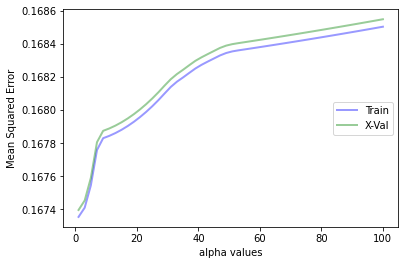

In [21]:
#Lasso 
alpha = np.linspace(1,100,50)
alpha = np.array([int(e) for e in alpha])
lasso = Lasso(tol = 5)

train_scores, test_scores = calc_params(x_train, y_train, lasso, alpha, 'alpha', 5)
min_error_idx = np.where(test_scores == test_scores.min())
min_error_alpha = alpha[min_error_idx]
print ('Minimum Mean Squared Error:', test_scores[min_error_idx][0],'alpha:', min_error_alpha[0])

Similar to feature selection, LASSO method reduces the variance in the model by scaling the coefficients toward 0. It will automatically scale down and shrinks less important variables to 0 and left out of the model, hence the feature selection. With that in mind, the initial step is to find the optimal alpha for the dataset. To achieve that, we used the calculate parameters function that returns a train score and a test score as it iterates 100 alphas. The best alpha will produce the lowest mean absolute error.

In [22]:
lasso1 = Lasso(alpha = 1, tol = 5)
lasso1.fit(x_train, y_train)
predict = lasso1.predict(x_test)
mse = metrics.mean_squared_error(y_test, predict)
error = predict - y_test
total_error = np.dot(error,error)
rmse= np.sqrt(total_error/len(y_test))

print('Aplha = 1')
print ('RMSE on test data:', rmse)
print ('Mean absolute error on test data:', mse)

Aplha = 1
RMSE on test data: 0.4103375781019464
Mean absolute error on test data: 0.16837692800257092


With alpha = 1, we were able to improve the model with an RMSE of .41. 5% improvement from the initial multiple-regression and feature selection.

----

## PCA

In [23]:
#perform train - test split
X = df
y = X['LOAN_DEFAULT']
X = X.drop(columns = ['LOAN_DEFAULT','BRANCH_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 
                      'EMPLOYEE_CODE_ID', 'STATE_ID','EMPLOYEE_CODE_ID'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2021)

Now, we are going to perform a PCA analysis to see if we can identify any underlying trends in our data and possibly perform feature selection to run our models.  Prior to running PCA we need to drop some unneeded columns that are not providing us with any real information.

In [24]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(180394, 55) (180394,) (45099, 55) (45099,)


After performing our train-test split, we can see that all of our new matrices are in the right shape.  Now we can proceed to scale our data and save the normalized data to new variables.

In [25]:
from sklearn.preprocessing import StandardScaler
#stardardize the data
scaler = StandardScaler()

norm_x_train = scaler.fit_transform(x_train)
norm_x_test = scaler.transform(x_test)

In [26]:
from sklearn.decomposition import PCA
#Time for PCA
pca = PCA(.95).fit(norm_x_train)

pca.n_components_

38

To initialize our PCA I wanted to first identify how many components would be required to capture 95% of the variance.  We can see that this is 38 components and is not much of a reduction in our number of features.  Now let's create a plot to further analyze the variance captured vs the number of components:

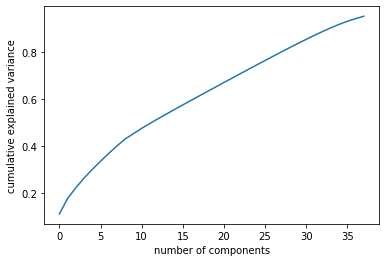

In [27]:
pca2 = PCA().fit(norm_x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Unfortunately for us, there does not appear to be a dramatic cutoff in terms of variance captured and the number of components.  Still, I believe we can choose fewer, than the 38 required to capture 95% of variance, as the later increases are really only adding a percentage or two to variance captured.  I am going to settle with 30 components, this captures roughly 80% of the variance.

Now let's take a look at the loadings of the components on the variables.

In [29]:
pca3 = PCA(30).fit(norm_x_train)

In [30]:
loadings = pca3.components_
num_pc = pca3.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
variable,,,,,,,,,,,,,,,,,,,,,
DISBURSED_AMOUNT,0.015274,-1.718592e-02,3.544013e-02,-0.038128,1.811407e-01,-0.455236,-2.297626e-01,0.414783,-1.514508e-01,8.324657e-02,...,1.517607e-02,-1.376860e-03,-1.721438e-02,3.106701e-02,2.959050e-03,-8.314836e-03,-3.059440e-03,1.783930e-03,5.668592e-03,-9.751194e-02
ASSET_COST,-0.024442,-9.011132e-03,9.141137e-02,-0.151982,2.179055e-01,-0.398531,-1.647996e-01,0.384008,-1.616825e-01,-4.586051e-02,...,-4.094606e-02,-2.135829e-02,-2.099394e-03,2.019432e-02,-1.593969e-02,3.962153e-03,1.712734e-02,2.996694e-02,8.103795e-03,-9.663261e-02
LTV,0.056920,-1.080912e-02,-7.688928e-02,0.154952,-4.410499e-02,-0.100008,-1.004160e-01,0.057037,6.996535e-03,1.841623e-01,...,7.785361e-02,2.427971e-02,-2.382983e-02,1.935964e-02,2.649909e-02,-2.012750e-02,-2.924977e-02,-3.854015e-02,-8.580385e-03,-3.388424e-02
DATE_OF_BIRTH,-0.109983,2.094062e-02,-2.387316e-02,0.097546,1.502551e-01,-0.130048,-5.641081e-02,-0.054825,-3.301599e-02,-2.797034e-01,...,4.122372e-02,-3.958523e-02,4.191077e-03,4.181829e-03,6.720605e-03,-1.529214e-02,-4.492813e-02,2.293221e-02,-1.157463e-01,-2.881271e-01
DISBURSAL_DATE,-0.010187,-2.260981e-02,2.124531e-02,-0.038663,6.847650e-02,-0.108928,-8.972562e-02,0.196444,-2.629083e-02,-8.541660e-03,...,2.950206e-02,8.198330e-02,6.069457e-02,-6.107933e-02,1.039833e-02,6.954121e-02,1.489260e-02,-6.525212e-02,8.384704e-02,6.674237e-01
MOBILENO_AVL_FLAG,-0.000000,-4.336809e-19,5.551115e-17,-0.000000,1.110223e-16,-0.000000,-2.775558e-17,-0.000000,-5.551115e-17,5.551115e-17,...,3.122502e-17,-4.163336e-17,9.714451e-17,-6.938894e-18,-4.163336e-17,-2.775558e-17,8.326673e-17,2.081668e-17,-4.510281e-17,1.994932e-16
AADHAR_FLAG,0.046835,-8.064431e-03,-1.415739e-01,0.391434,-2.354560e-01,0.235752,-2.802900e-01,0.285272,-1.002028e-01,-2.378602e-02,...,-1.761640e-02,-5.127309e-03,1.269821e-02,4.429370e-03,-1.376303e-02,4.250798e-03,-6.952419e-03,9.084366e-03,-1.950233e-02,-8.276980e-02
PAN_FLAG,-0.001205,1.840801e-02,2.984817e-02,-0.132857,1.176588e-01,-0.118147,1.132829e-01,-0.122001,7.797025e-04,2.467018e-02,...,-3.703158e-02,-2.411346e-02,3.013796e-02,-2.215967e-03,-2.674903e-02,-1.585091e-03,-1.397067e-03,2.668901e-02,-6.690616e-02,-3.115545e-01
VOTERID_FLAG,-0.048907,9.525536e-03,1.334888e-01,-0.374268,2.252190e-01,-0.213058,2.595264e-01,-0.267805,9.061690e-02,1.465280e-02,...,8.240300e-03,-5.460142e-03,1.666470e-02,-1.157220e-02,-1.022057e-02,1.138992e-02,-6.368964e-03,-1.067747e-02,7.393574e-02,5.598228e-02


Given the dimensions of this new dataframe it is a bit hard to really identify anything meaningful, let's see if we can graphically represent the information in a more digestible manner.  I am only going to be using the first 10 components for interpretability. 

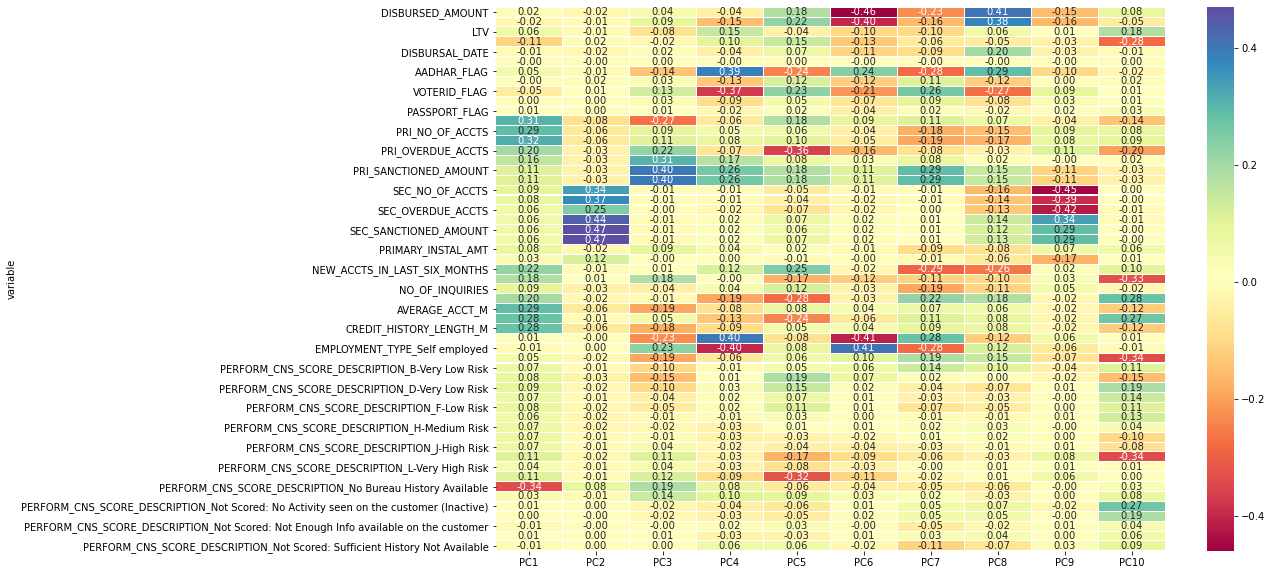

In [31]:
#look at the first 10 principal components and their loadings on attributes
f, ax = plt.subplots(figsize=(15, 10))
load = loadings_df.iloc[: , :10]
hm = sns.heatmap(round(load,2), annot=True, ax=ax, cmap="Spectral",fmt='.2f', linewidths=.05)

From this graph we can Identify a few interesting items.  The second component has a strong relation to the number of accounts (loans), overdue accounts, sanctioned amount.  This makes intuitive sense that these attributes would be strongly linked as they are all aspects of the customers loan history.  We also see strong association in the 6th component for disbursed amount, LTV, and credit history length.  This also makes sense that the loan to value of the asset, disbursed amount and credit history are also highly related.  Interestingly employment type is negatively correlated to these, idicating that the type of employment matters (salaried vs self employed) and this also makes a lot of intuitive sense.

Now let's try a little bit of factor analysis to see if we can gather any other interesting insights.  I once again will just be using 10 components to make the information more readable.  Unfortunately, it once again was difficult to really find any underlying details or linkages between variables that might be interesting to note.  I belive this is partly due to the fact that each component/factor only accounts for a limited amount of variance and it has made our analysis more challenging.  I attmpted to use a factanal library to gather a more "r" style readout but unfortunantely I was unable to get this to work in a manner that suits our dataset.

In [32]:
#now let's do a little factor analysis, again just looking at first 10 PC's for interpretation
from sklearn.decomposition import FactorAnalysis
factor = FactorAnalysis(n_components=10, random_state=2021).fit(norm_x_train)
print (pd.DataFrame(factor.components_,columns=X.columns))

   DISBURSED_AMOUNT  ASSET_COST       LTV  DATE_OF_BIRTH  DISBURSAL_DATE  \
0          0.019424   -0.058224  0.106301       0.090236       -0.026393   
1         -0.004123   -0.009865  0.009192      -0.010568       -0.015916   
2          0.006322   -0.001243  0.009999      -0.043412       -0.001557   
3         -0.234405   -0.084049 -0.217276       0.172727       -0.022946   
4          0.913866    0.727396  0.291155       0.058192        0.138623   
5          0.284846    0.198687  0.126324       0.145442        0.064393   
6         -0.012336   -0.017547  0.006167       0.065931       -0.016778   
7          0.007728    0.015478 -0.008125      -0.085919       -0.029080   
8          0.002828   -0.010765  0.019907       0.131787       -0.022832   
9         -0.000350    0.030471 -0.045760      -0.030806       -0.001962   

   MOBILENO_AVL_FLAG  AADHAR_FLAG  PAN_FLAG  VOTERID_FLAG  DRIVING_FLAG  ...  \
0      -0.000000e+00     0.086019 -0.003615     -0.087755     -0.003283  ...   
1  

Now we will create an x variable containing the PCA components in order to plug back into our regression algorithms.

In [39]:
# using 30 components in order to retain 80% of the variance
# insert our PCA variable into the regression algorithm
pca4 = PCA(n_components=None)
pca.fit(norm_x_train)
X_train_pca = pca.transform(norm_x_train)

X_train_pca = X_train_pca[:, 0:30]

In [48]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

In [49]:
reg4L = LinearRegression()
reg4L.fit(X_train_pca, y_train)

pred4L_train = reg4L.predict(X_train_pca)
reg4L_train_r2 = r2_score(y_train, pred4L_train)
reg4L_train_MSE = mean_squared_error(y_train, pred4L_train)

print('R2 Training score: ', reg4L_train_r2)
print('MSE Training score: ', reg4L_train_MSE)

R2 Training score:  0.027514743318174606
MSE Training score:  0.1652252688203219


In [51]:
LR2 = LinearRegression()
LR2.fit(X_train_pca, y_train)

predit = LR2.predict(X_train_pca)
error = abs(predit-y_train)
total_error = np.dot(error,error)
rmse_train = np.sqrt(total_error/len(predit))

print('Total error:', total_error)
print('The RMSE is:',rmse_train)

Total error: 29805.647143573144
The RMSE is: 0.40647911240348117


After inputing our PCA variables into the regression formula, we weren't really able to improve our scores all that much from our original models.  In fact we have not seen much movement in our RMSE values from the original regression through feature selection and then through PCA selection.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Check for multicollinearity - VIF
vif = pd.DataFrame()
vif["Attr"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
             for i in range(len(X.columns))]
print(vif)

                                                 Attr           VIF
0                                    DISBURSED_AMOUNT  3.088539e+01
1                                          ASSET_COST  2.866649e+01
2                                                 LTV  1.502526e+01
3                                       DATE_OF_BIRTH  1.128586e+00
4                                      DISBURSAL_DATE  1.055807e+00
5                                   MOBILENO_AVL_FLAG  0.000000e+00
6                                         AADHAR_FLAG  7.928303e+00
7                                            PAN_FLAG  1.059824e+00
8                                        VOTERID_FLAG  7.116773e+00
9                                        DRIVING_FLAG  1.852937e+00
10                                      PASSPORT_FLAG  1.079402e+00
11                                  PERFORM_CNS_SCORE  1.110670e+03
12                                    PRI_NO_OF_ACCTS  2.713375e+00
13                                   PRI_ACTIVE_

In [48]:
## Decision Tree and Random Forest

In [49]:
df2 = df
target2 = df['LOAN_DEFAULT']
df2 = df2.drop(columns = ['LOAN_DEFAULT'])

treeX_train, treeX_test, treeY_train, treeY_test = train_test_split(df2, target2, test_size = 0.2, random_state = 930)

treeX = np.array(treeX_train)
treeTarget = np.array(treeX_test)
treeY = np.array(treeY_train)
yTarget = np.array(treeY_test)

In [50]:
#Decision Tree
treeclf = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split = 12000)
treeclf = treeclf.fit(treeX, treeY)
tree_pred = treeclf.predict(treeX_test)

print("Accuracy on Test Set:", metrics.accuracy_score(yTarget, tree_pred))

Accuracy on Test Set: 0.7815472626887514


In [ ]:
from sklearn.tree import export_graphviz
tree.export_graphviz(treeclf, out_file='decisionTree.dot', feature_names = df2.columns)
import graphviz
from os import system
system('dot -Tpng decisionTree.dot -o decisionTree.png')

![Decision Tree](decisionTree.png "Decision Tree")

The decision was able to produce a score of .78 on the test dataset using entropy. It calculates the entropy of each feature after every split and selects the best feature. The higher the entropy more the information content. The split was set to require a minimum of 12000 samples to split into a new leaf. Thus, it creates a more reasonable tree structure and less likely to be overfitted.

In [52]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(max_depth=2, random_state=0, min_samples_split = 1000)
rfclf.fit(treeX, treeY)
rfclf_pred = rfclf.predict(treeX_test)

print("Accuracy on Test Set:", metrics.accuracy_score(yTarget, tree_pred))

Accuracy on Test Set: 0.7815472626887514


In [ ]:
export_graphviz(rfclf.estimators_[0], out_file='randomForest.dot', feature_names = df2.columns)
system('dot -Tpng randomForest.dot -o randomForest.png')

![Random Forest](randomForest.png "Random Forest")

The random forest has an identical test accuracy score of 0.78. The difference between the decision tree and the random forest is the number of trees and the minimum sample split. The random forest generated 100 smaller trees that interchange according to the data. Therefore, it was able to predict loan default with lesser splits.

----

## Naive Bayes

In [15]:
target = df.LOAN_DEFAULT
dfKNN = df.drop(columns = ['LOAN_DEFAULT'])
target.shape

(225493,)

Since KNN is supervised method, we need to separeate database into data and target two sets.

In [16]:
target.head()

0    0
1    1
2    0
3    1
4    1
Name: LOAN_DEFAULT, dtype: int64

In [17]:
#seprate into test and train sets
from sklearn.model_selection import train_test_split

train, test, train_label, test_label = train_test_split(dfKNN, target, test_size=0.2, random_state=33)
print(train.shape, test.shape)

(180394, 61) (45099, 61)


After separate dataset into target set and dataset, we split them into 2 parts which are train and test datasets.

In [18]:
print(train_label.shape, test_label.shape)

(180394,) (45099,)


In [19]:
train.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,DISBURSAL_DATE,STATE_ID,...,PERFORM_CNS_SCORE_DESCRIPTION_K-High Risk,PERFORM_CNS_SCORE_DESCRIPTION_L-Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_M-Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_No Bureau History Available,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Sufficient History Not Available
172064,35287,63641,59.08,18,22927,45,2702,725015,736924,4,...,0,0,0,0,0,0,0,0,0,0
111014,59413,66897,89.99,61,22778,86,1316,724580,736988,6,...,0,0,0,0,0,0,0,0,0,0
106405,66169,90700,73.87,160,24119,51,571,727198,736998,15,...,0,0,1,0,0,0,0,0,0,0
129379,61720,73851,85.00,162,15805,86,1908,720045,736989,4,...,0,0,0,1,0,0,0,0,0,0
195016,61647,73492,85.72,70,18435,86,2412,723667,736937,4,...,0,0,1,0,0,0,0,0,0,0


In [20]:
trainA = np.array(train)
testA = np.array(test)
traintblF = np.array(train_label).flatten()
testtblF = np.array(test_label).flatten()

In [17]:
#Naive Bayes
from sklearn import neighbors, tree, naive_bayes
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(train, train_label)
nbpreds_test = nbclf.predict(test)
print (nbpreds_test)

[0 0 0 ... 0 0 0]


In [18]:
# compute the average accuracy score across the test instances
print (nbclf.score(train, train_label))

0.7730024280186703


In [19]:
#compared to the performance on the training data itself (to check for over- or under-fitting)
print (nbclf.score(test, test_label))

0.7707931439721502


In [20]:
from sklearn.metrics import confusion_matrix
nbccm = confusion_matrix(test_label, nbpreds_test, labels=[0,1])
print(nbccm)

[[34687   579]
 [ 9758    75]]


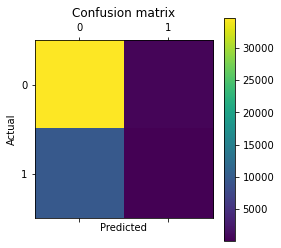

In [21]:
plt.matshow(nbccm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

As we can see from this confusion matrix, there are about 10000 results got wrong, but most of users were perdicted right by Navie Bayes method.

In [22]:
from sklearn.model_selection import cross_val_score
nbcv_scores = cross_val_score(nbclf, df, target, cv=10)
print(nbcv_scores)

[0.77627494 0.77427938 0.24957871 0.77378154 0.77533372 0.77302763
 0.77755111 0.77404763 0.77280589 0.77165284]


In [23]:
print("Overall Average Accuracy for Naive Bayes (Gaussian): %0.2f (+/- %0.2f)" % (nbcv_scores.mean(), nbcv_scores.std() * 2))

Overall Average Accuracy for Naive Bayes (Gaussian): 0.72 (+/- 0.31)


By using Navie Bayes (Gaussian) method on this target dataset, the average accuracy is around 0.72.

---

## KNN

In [24]:
#scikit-learn's KNN classifier
#Performing min-max normalization to rescale numeric attributes.
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler().fit(train)
data_trainN = min_max_scaler.transform(train)
data_testN = min_max_scaler.transform(test)

In [25]:
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Run the function on a range of values for K in order to compare accuracy values for different numbers of neighbors.
#For example, when we try evaluating the classifiers on a range of values of K from 1 through 20 and present 
#the results as a table.

test = []
train = []
avgResult = []
result = {}
for i in range(1,21):

    knnclf = neighbors.KNeighborsClassifier(i, weights='distance')
    knnclf.fit(data_trainN, train_label)
    #Next, we call the predict function on the test intances to produce the predicted classes.
    knnpreds_test = knnclf.predict(data_testN)
    
    #scikit-learn has various modules that can be used to evaluate classifier accuracy
    print(classification_report(test_label, knnpreds_test))
    
    #confusion matrix
    knncm = confusion_matrix(test_label, knnpreds_test)
    print(knncm)
    
    #get percentahe score from test and train dataset
    # compute the average accuracy score across the test instances
    testScore = knnclf.score(data_testN, test_label)
    #compared to the performance on the training data itself (to check for over- or under-fitting)
    trainScore = knnclf.score(data_trainN, train_label)
    avgScore = (trainScore + testScore)/2
    
    train.append(trainScore.round(3))
    test.append(testScore.round(3))
    avgResult.append(avgScore.round(3)) 
    

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     35266
           1       0.26      0.26      0.26      9833

    accuracy                           0.68     45099
   macro avg       0.53      0.53      0.53     45099
weighted avg       0.68      0.68      0.68     45099

[[27933  7333]
 [ 7291  2542]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     35266
           1       0.26      0.26      0.26      9833

    accuracy                           0.68     45099
   macro avg       0.53      0.53      0.53     45099
weighted avg       0.68      0.68      0.68     45099

[[27933  7333]
 [ 7291  2542]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83     35266
           1       0.28      0.18      0.22      9833

    accuracy                           0.72     45099
   macro avg       0.54      0.53      0.52     45099
weighted avg

In [27]:
result['train'] = train
result['test'] = test
result['avg'] = avgResult
withWeighting = pd.DataFrame(result, columns=['train', 'test', 'avg'])
withWeighting

,train,test,avg
0,1.0,0.676,0.838
1,1.0,0.676,0.838
2,1.0,0.721,0.861
3,1.0,0.724,0.862
4,1.0,0.744,0.872
5,1.0,0.745,0.872
6,1.0,0.755,0.877
7,1.0,0.756,0.878
8,1.0,0.764,0.882
9,1.0,0.765,0.883


After we try evaluating the classifiers on a range of values of K from 1 through 20, from the result table, when K=7, we can get the best result for KNN method. And the accuracy for KNN on test dataset is 75.6%. When K=8, there is an overfitting problem as we can see the accuracy after a huge increase steady increase with K value increasing. The range for testing column is 67.6% - 77.7%.